In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import pandas as pd


In [2]:
ds=xr.open_dataset("/seq001/data/roms_his_DailyNudge_2018_5daymn_processed.nc")
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, Nuser: 1, eta_rho: 600, xi_rho: 800,
                      xi_u: 799, eta_v: 599)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2025-12-30 ... 2026-12-25
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    lat_rho          (eta_rho, xi_rho) float64 ...
    lon_rho          (eta_rho, xi_rho) float64 ...
    z_w              (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    z_rho            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    z_rho0           (eta_rho, xi_rho, s_rho) float64 ...
Dimensions without coordinates: bnds, tracer, boundary, Nuser, eta_rho, xi_rho,
                                xi_u, eta_v
Data variables: (12/51)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    z_u              (ocean_time, s_rho, eta_rho, xi_u) float64 ...
    z_v              (ocean_time, s_rho, eta_v, xi_rho) float64 ...
    dx               (eta_rho, xi_rho) float64 ...
    dy               (eta_rho, xi_rho) float64 ...
    dz               (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    dA               (eta_rho, xi_rho) float64 ...
Attributes: (12/38)
    CDI:                        Climate Data Interface version 2.0.4 (https:/...
    Conventions:                CF-1.4, SGRID-0.3
    file:                       roms_his_0020.nc
    format:                     netCDF-3 64bit offset file
    type:                       ROMS grid file
    title:                      South-east Queensland, 1/100 (900m) degree re...
    ...                         ...
    history:                    Mon Feb 19 09:22:01 2024: ncks -A ROMS_grid_c...
    ana_file:                   ROMS/Functionals/ana_btflux.h
    CPP_options:                SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE,...
    CDO:                        Climate Data Operators version 2.0.4 (https:/...
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    history_of_appended_files:  Mon Feb 19 09:22:01 2024: Appended file ROMS_...

In [3]:
ds_grid=xr.open_dataset("/seq001/data/roms_his_DailyNudge_2018_5daymn_grid_vars.nc")

In [4]:
#fix dates
dates = pd.to_datetime(ds['ocean_time'].values)  # Convert the numpy array of dates to Pandas datetime objects
modified_dates = [date.replace(year=2018) for date in dates]
modified_dates[0] = [date.replace(year=2017) for date in dates][0]
ds['ocean_time'] = modified_dates
ds_grid['ocean_time'] = modified_dates
ds


<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, Nuser: 1, eta_rho: 600, xi_rho: 800,
                      xi_u: 799, eta_v: 599)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2017-12-30 ... 2018-12-25
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    lat_rho          (eta_rho, xi_rho) float64 ...
    lon_rho          (eta_rho, xi_rho) float64 ...
    z_w              (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    z_rho            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    z_rho0           (eta_rho, xi_rho, s_rho) float64 ...
Dimensions without coordinates: bnds, tracer, boundary, Nuser, eta_rho, xi_rho,
                                xi_u, eta_v
Data variables: (12/51)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    z_u              (ocean_time, s_rho, eta_rho, xi_u) float64 ...
    z_v              (ocean_time, s_rho, eta_v, xi_rho) float64 ...
    dx               (eta_rho, xi_rho) float64 ...
    dy               (eta_rho, xi_rho) float64 ...
    dz               (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    dA               (eta_rho, xi_rho) float64 ...
Attributes: (12/38)
    CDI:                        Climate Data Interface version 2.0.4 (https:/...
    Conventions:                CF-1.4, SGRID-0.3
    file:                       roms_his_0020.nc
    format:                     netCDF-3 64bit offset file
    type:                       ROMS grid file
    title:                      South-east Queensland, 1/100 (900m) degree re...
    ...                         ...
    history:                    Mon Feb 19 09:22:01 2024: ncks -A ROMS_grid_c...
    ana_file:                   ROMS/Functionals/ana_btflux.h
    CPP_options:                SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE,...
    CDO:                        Climate Data Operators version 2.0.4 (https:/...
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    history_of_appended_files:  Mon Feb 19 09:22:01 2024: Appended file ROMS_...

In [5]:

def makeROMSGridObject(gridIn):
    gridOut = Grid(gridIn, 
    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}},
    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    },
    periodic=False)
    
    return gridOut

grid = makeROMSGridObject(ds_grid)
del(ds_grid)

Ocean Heat Content

In [6]:
dV = (1/ds.pm)*(1/ds.pn)*ds.dz
rho0=1026
cp0=4181.3
OHC=rho0*cp0*dV*(ds.temp+273.15)

In [7]:
TotalOHC = OHC.sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
TotalOHC_above1000 = OHC.where((ds.z_rho0>-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
TotalOHC_below1000 = OHC.where((ds.z_rho0<-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
ds['zmin']=ds.z_rho0.min(dim=["s_rho"])
Shelf_OHC=OHC.where(((ds.zmin>-200)&(ds.lon_rho<154.5)).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')

<Figure size 640x480 with 0 Axes>

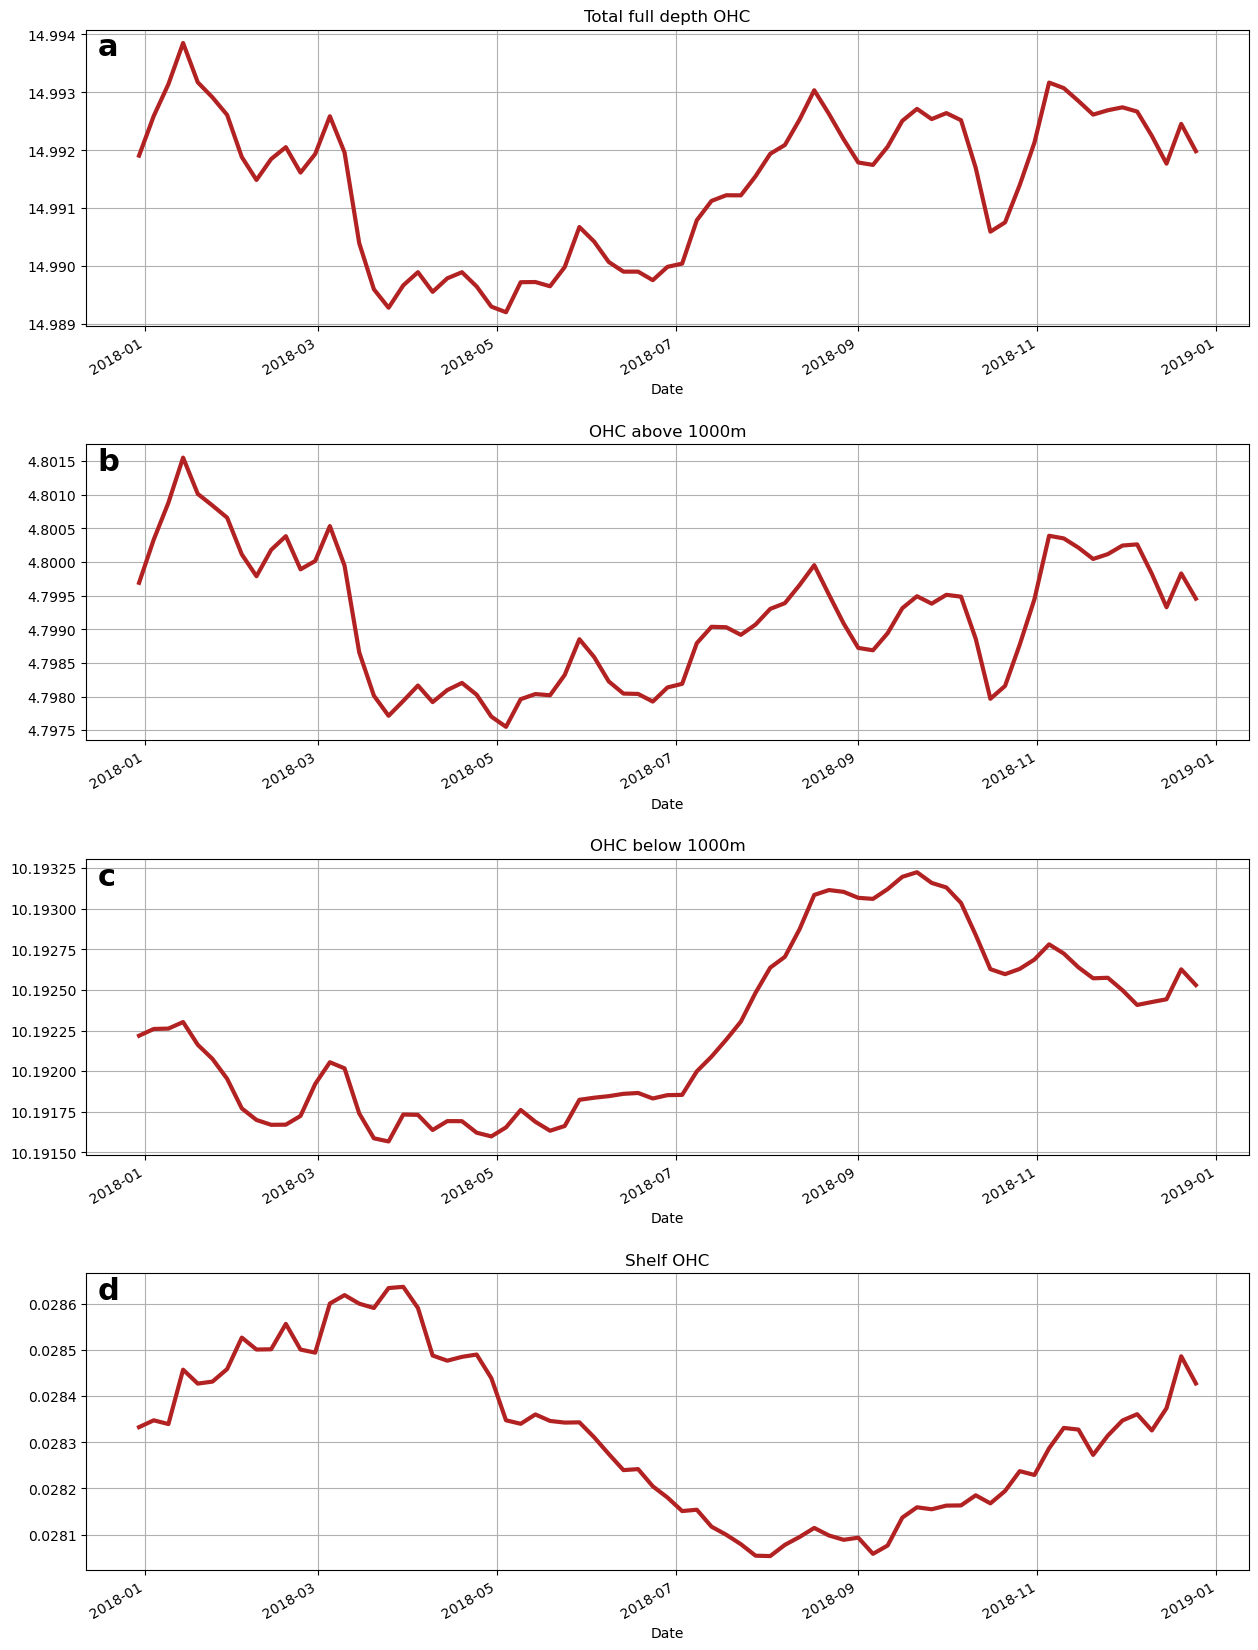

In [8]:
gs = gridspec.GridSpec(nrows=4,ncols=1,wspace=0.05, hspace=0.4)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,20])
ax = None


ax = fig.add_subplot(gs[0,0])
(TotalOHC/1e23).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'a', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Total full depth OHC')
plt.xlabel('Date')
plt.grid()

ax = fig.add_subplot(gs[1,0])
(TotalOHC_above1000/1e23).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'b', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('OHC above 1000m')
plt.xlabel('Date')
plt.grid()

ax = fig.add_subplot(gs[2,0])
(TotalOHC_below1000/1e23).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'c', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
ax.ticklabel_format(axis="y", useOffset=False)
plt.title('OHC below 1000m')
plt.xlabel('Date')
plt.grid()

ax = fig.add_subplot(gs[3,0])
(Shelf_OHC/1e23).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'd', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Shelf OHC')
plt.xlabel('Date')
plt.grid()

In [9]:

depth_OHC = OHC.sum(dim='s_rho')
delOHC=((depth_OHC.sel(ocean_time=OHC.ocean_time.dt.month.isin([7])).mean(dim='ocean_time')-depth_OHC.sel(ocean_time=OHC.ocean_time.dt.month.isin([1])).mean(dim='ocean_time'))/depth_OHC.sel(ocean_time=OHC.ocean_time.dt.month.isin([1])).mean(dim='ocean_time'))*100


Text(0.5, 1.0, '')

<Figure size 640x480 with 0 Axes>

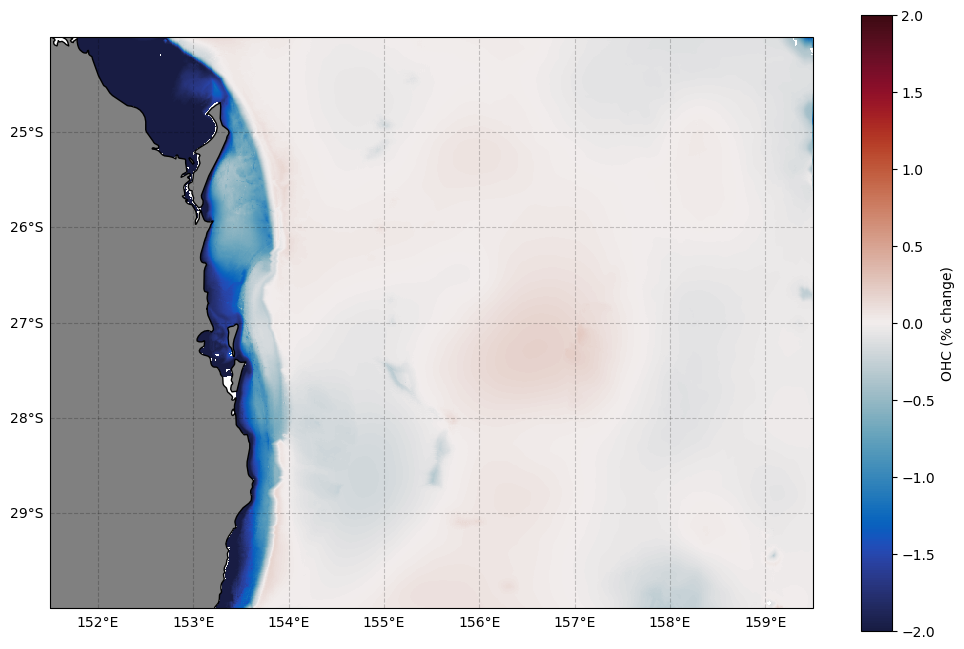

In [10]:
#second way
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12.3,8])#what is this?
ax = None


ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.set_extent([151.5, 159.5, -30, -24])
Coast = cfeature.NaturalEarthFeature(category='physical',scale='10m',facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ax.pcolormesh(delOHC.lon_rho,delOHC.lat_rho,delOHC.values,cmap='cmo.balance')
im.set_clim(-2,2)
gl = ax.gridlines(draw_labels=True,
                 color='black', alpha=0.2, linestyle='--')
#axis labels
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True

ax.text(0.01, 0.99, ' ', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
ax.set_title('')

cbar = fig.colorbar(im)
cbar.set_label('OHC (% change)')

ax.set_title('')

Grid averages

<Figure size 640x480 with 0 Axes>

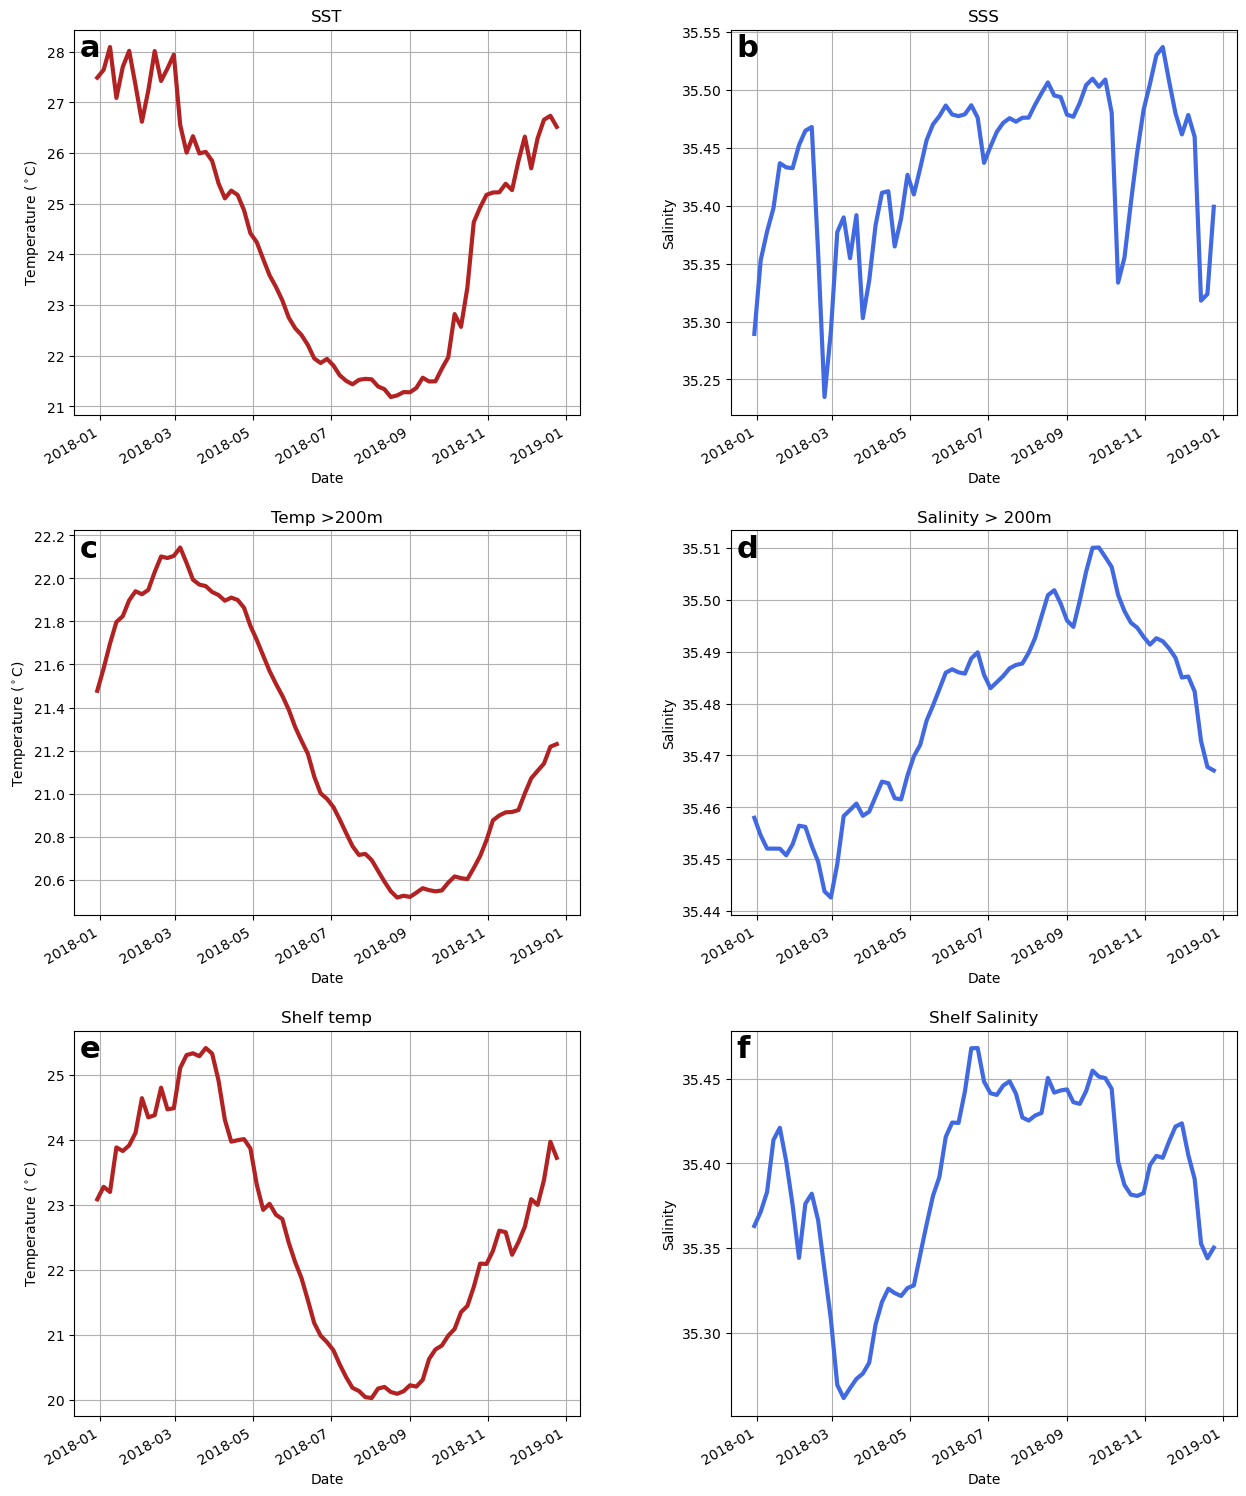

In [11]:

gs = gridspec.GridSpec(nrows=3,ncols=2,wspace=0.3, hspace=0.3)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,18])#what is this?
ax = None

ax = fig.add_subplot(gs[0,0])
grid.average( ds.temp.isel(s_rho=-1) ,['X','Y']).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'a', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('SST')
plt.xlabel('Date')
plt.ylabel('Temperature ($^\circ$C)')
plt.grid()

ax = fig.add_subplot(gs[1,0])
grid.average( ds.temp.where((ds.z_rho0 > -200)) ,['X','Y','Z']).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'c', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Temp >200m')
plt.xlabel('Date')
plt.ylabel('Temperature ($^\circ$C)')
plt.grid()

ax = fig.add_subplot(gs[2,0])
grid.average( ds.temp.where(((ds.zmin>-200)&(ds.lon_rho<154.5))) ,['X','Y','Z']).plot(linewidth=3,color='firebrick')
ax.text(0.01, 0.99, 'e', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Shelf temp')
plt.xlabel('Date')
plt.ylabel('Temperature ($^\circ$C)')
plt.grid()

ax = fig.add_subplot(gs[0,1])
grid.average( ds.salt.isel(s_rho=-1) ,['X','Y']).plot(linewidth=3,color='royalblue')
ax.text(0.01, 0.99, 'b', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('SSS')
plt.xlabel('Date')
plt.ylabel('Salinity')
plt.grid()

ax = fig.add_subplot(gs[1,1])
grid.average( ds.salt.where((ds.z_rho0 > -200)) ,['X','Y','Z']).plot(linewidth=3,color='royalblue')
ax.text(0.01, 0.99, 'd', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Salinity > 200m')
plt.xlabel('Date')
plt.ylabel('Salinity')
plt.grid()

ax = fig.add_subplot(gs[2,1])
grid.average( ds.salt.where(((ds.zmin>-200)&(ds.lon_rho<154.5))) ,['X','Y','Z']).plot(linewidth=3,color='royalblue')
ax.text(0.01, 0.99, 'f', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
plt.title('Shelf Salinity')
plt.xlabel('Date')
plt.ylabel('Salinity')
plt.grid()